

###Yashwant Sai Kishore Kandregula

#Importing all the modules

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt #visualization
import pandas as pd
import seaborn as sns #visualization

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Loading the Dataset

In [ ]:
telcom = pd.read_csv("/content/drive/MyDrive/DP project/Customer-Churn.csv")#Loading the dataset
telcom.head()# printing first 5 records

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#Counting the rows and columns

In [ ]:
print('Telcom dataset has {} rows and {} columns'.format(telcom.shape[0],telcom.shape[1]))# count of rows and columns

Telcom dataset has 7043 rows and 21 columns


#Info of features

In [ ]:
telcom.info()# info of the dataset 

'''
7042 rows, 21 columns, no nulls

'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


'\n7042 rows, 21 columns, no nulls\n\n'

#Unique values and Categories of features

In [ ]:
# printing unique values in the dataset for each feature
#we can observe that the total charges feature has few empty values
# these values need to be replaced

for column in telcom.columns:
    uniques = sorted(telcom[column].unique()) # extracing unique values here and sort them 
    print('{0:20s} {1:5d} \t'.format(column,len(uniques)),uniques[:3]) # ' ' in column TotalCharges

customerID            7043 	 ['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ']
gender                   2 	 ['Female', 'Male']
SeniorCitizen            2 	 [0, 1]
Partner                  2 	 ['No', 'Yes']
Dependents               2 	 ['No', 'Yes']
tenure                  73 	 [0, 1, 2]
PhoneService             2 	 ['No', 'Yes']
MultipleLines            3 	 ['No', 'No phone service', 'Yes']
InternetService          3 	 ['DSL', 'Fiber optic', 'No']
OnlineSecurity           3 	 ['No', 'No internet service', 'Yes']
OnlineBackup             3 	 ['No', 'No internet service', 'Yes']
DeviceProtection         3 	 ['No', 'No internet service', 'Yes']
TechSupport              3 	 ['No', 'No internet service', 'Yes']
StreamingTV              3 	 ['No', 'No internet service', 'Yes']
StreamingMovies          3 	 ['No', 'No internet service', 'Yes']
Contract                 3 	 ['Month-to-month', 'One year', 'Two year']
PaperlessBilling         2 	 ['No', 'Yes']
PaymentMethod            4 	 ['Bank transfer

#Descriptive Statistics

In [ ]:
#replacing the empty values of total charges with np.nan to recognize them as NAN
telcom['TotalCharges'] = telcom['TotalCharges'].replace(" ",np.nan).astype(float)
telcom.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#Visualization of features

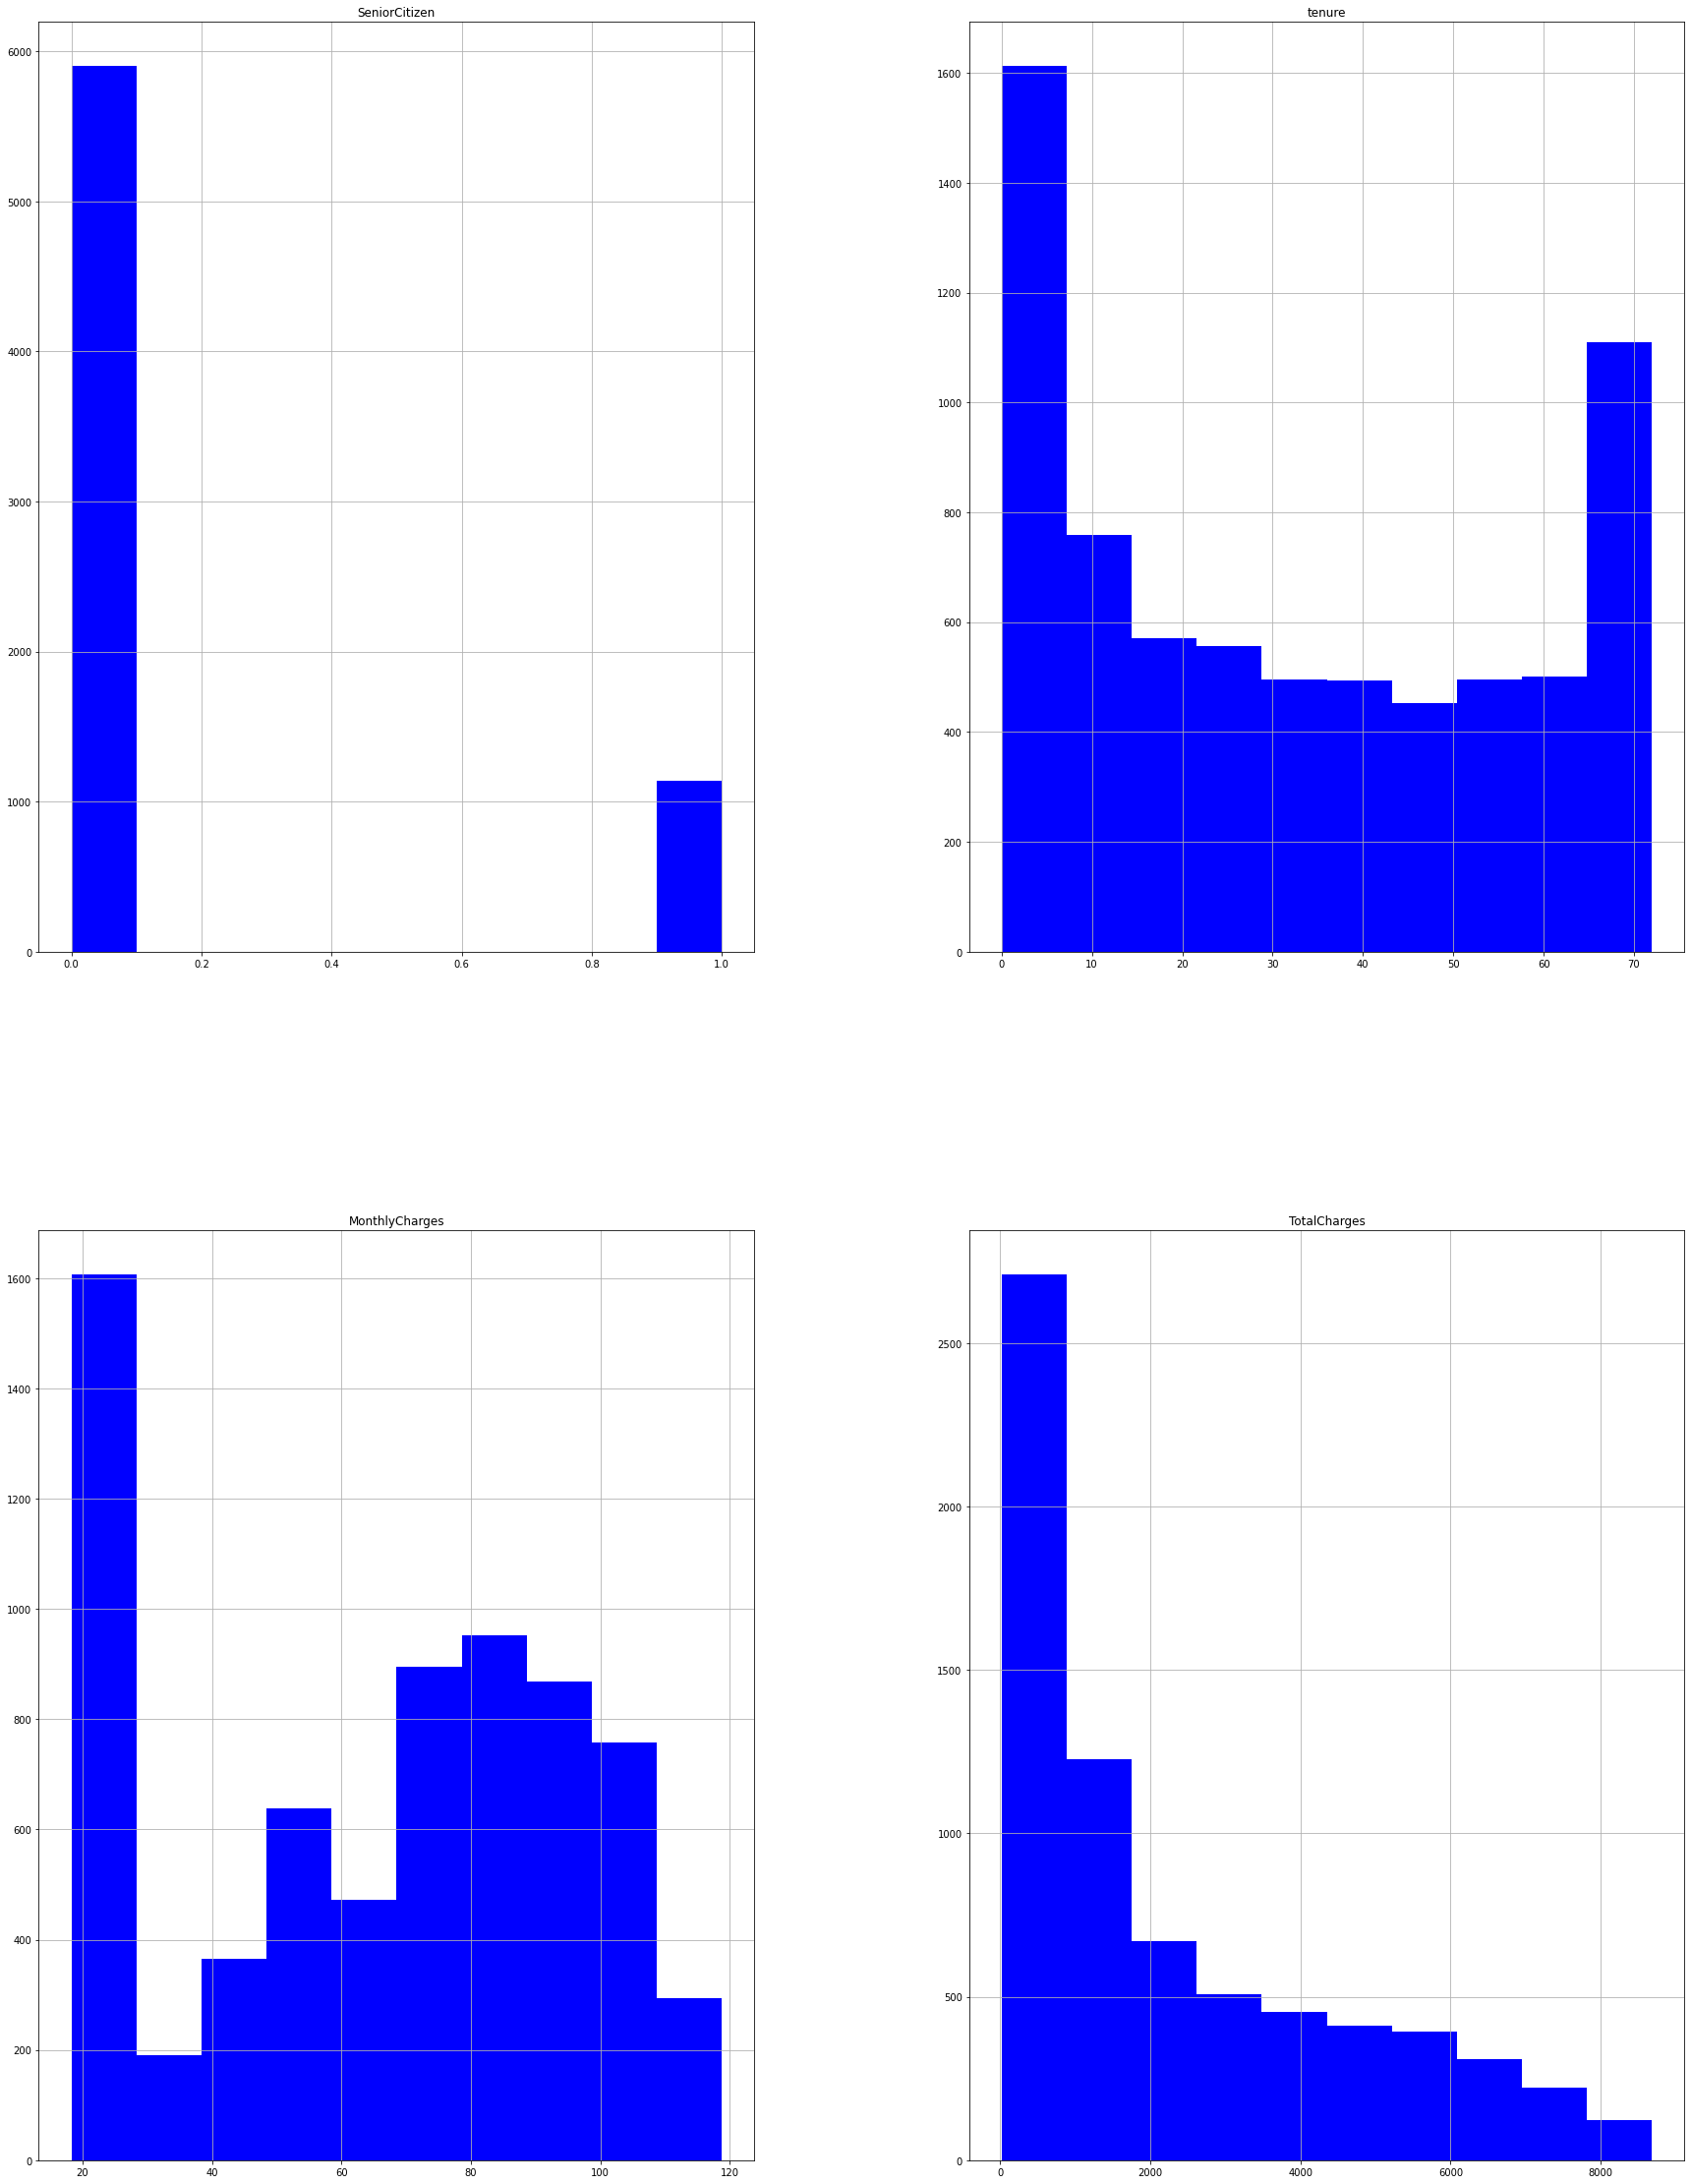

In [ ]:
#plotting histogram to telecom data
telcom.hist(figsize=(30,40),color='b')
plt.show()

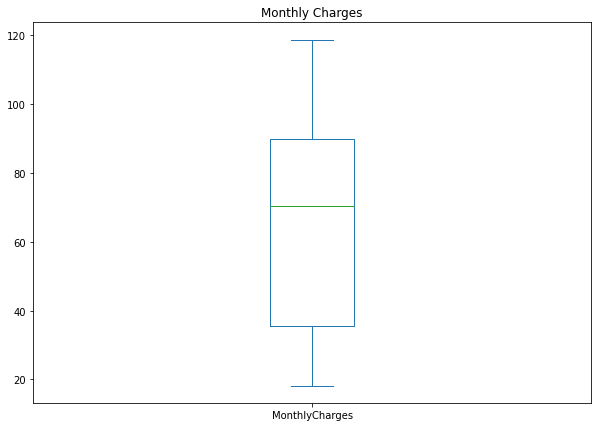

In [ ]:
fig = plt.figure(figsize =(10, 7))
telcom['MonthlyCharges'].plot(kind='box', title='Monthly Charges')
plt.show()

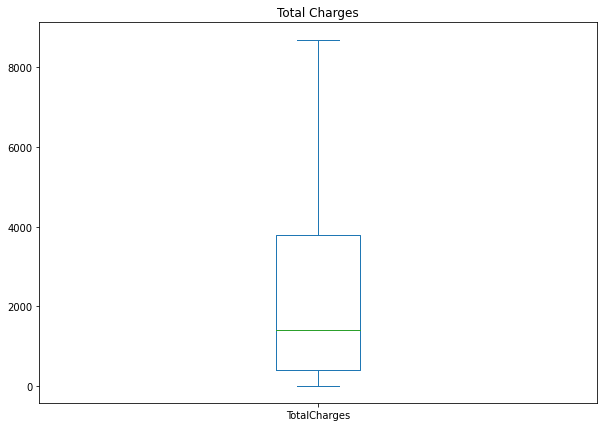

In [ ]:
fig = plt.figure(figsize =(10, 7))
telcom['TotalCharges'].plot(kind='box', title='Total Charges')
plt.show()

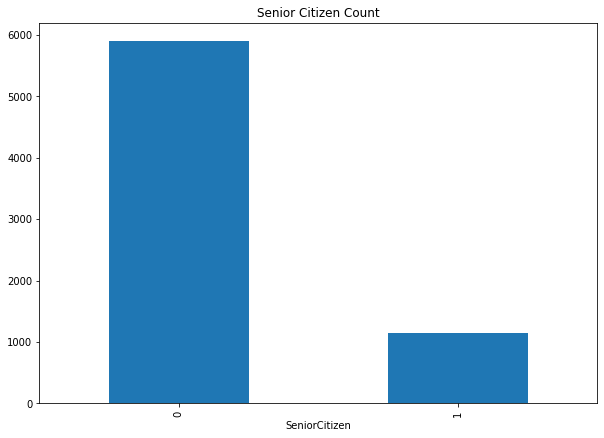

In [ ]:
fig = plt.figure(figsize =(10, 7))
telcom.groupby("SeniorCitizen")["SeniorCitizen"].count().plot(kind='bar', title='Senior Citizen Count')
plt.show()

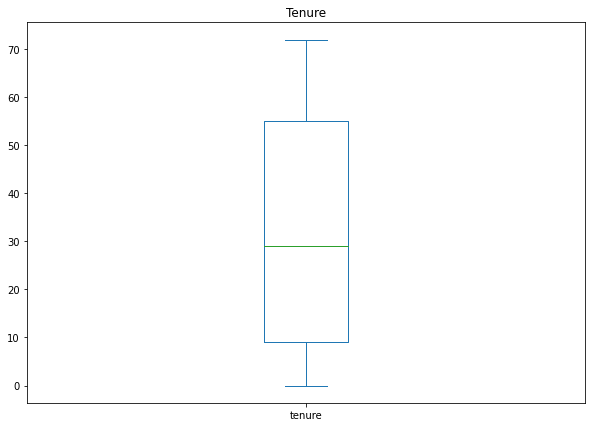

In [ ]:
fig = plt.figure(figsize =(10, 7))
telcom['tenure'].plot(kind='box', title='Tenure')
plt.show()

<Figure size 1368x216 with 0 Axes>

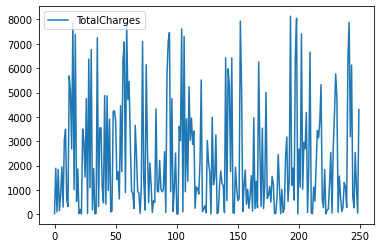

In [ ]:
from matplotlib.pyplot import figure
f = plt.figure()
f.set_figwidth(19)
f.set_figheight(3)
Num = list(range(0,250))
telcom_TotalCharges=telcom.loc[Num,['TotalCharges']]
telcom_TotalCharges.plot()
plt.show()

#Missing Value matrix

<Figure size 1368x216 with 0 Axes>

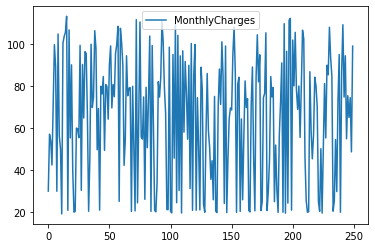

In [ ]:
f1 = plt.figure()
f1.set_figwidth(19)
f1.set_figheight(3)
N = list(range(0,250))
telcom_MonthlyCharges=telcom.loc[N,['MonthlyCharges']]
telcom_MonthlyCharges.plot()
plt.show()

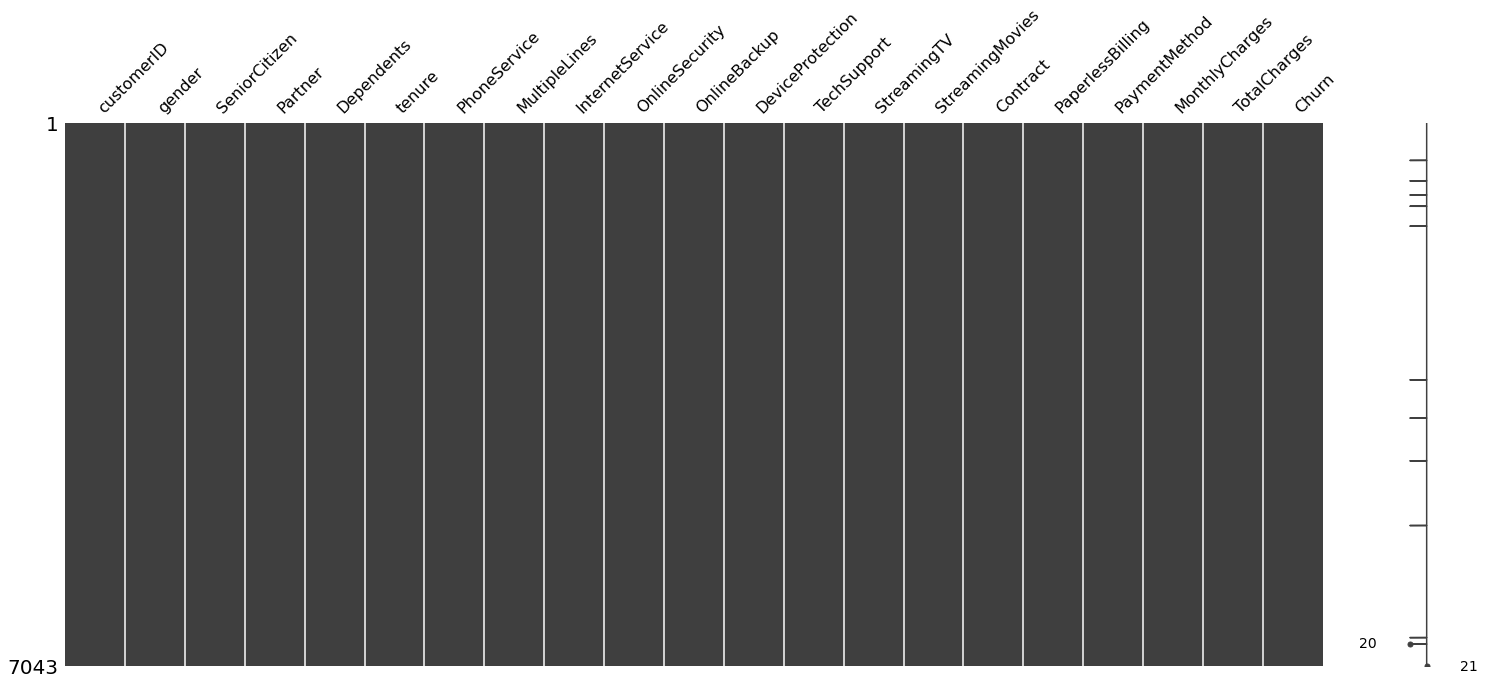

In [ ]:
import missingno as msno
msno.matrix(telcom)

#Bar plot of Target Column, Churn

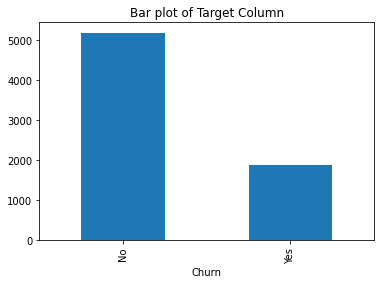

In [ ]:
telcom.groupby("Churn")["Churn"].count().T.plot(kind='bar')
plt.title("Bar plot of Target Column")
plt.show()

In [ ]:
churncoount=telcom.groupby("Churn")["Churn"].count()
churncoount

Churn
No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
#Ration of Churn Target Data

In [ ]:
df1 = churncoount[0]
df2 = churncoount[1]
ratio2 = ((df1)/len(telcom))
ratio1 = ((df2)/len(telcom))
ratio = (ratio1/ratio2)*100
print("The ratio of Yes vs No is {}".format(ratio))

The ratio of Yes vs No is 36.12292230382683


#Replacing NaN values and plotting the pariplot of numeric features

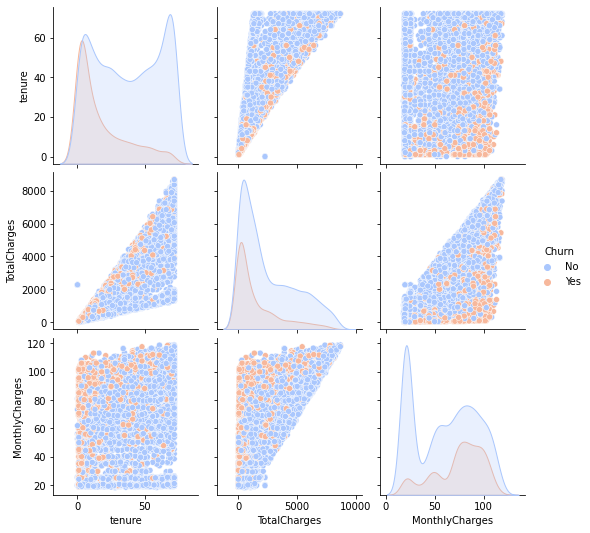

In [ ]:
# Replace NaN values  with mean
telcom['TotalCharges'] = telcom['TotalCharges'].replace(np.nan, np.mean(telcom['TotalCharges'][~np.isnan(telcom['TotalCharges'])])) 

# Visualize numeric features
sub = telcom[['tenure','TotalCharges','MonthlyCharges','Churn']]
sns.pairplot(sub, hue='Churn', palette='coolwarm')

#handling imbalanced data of churn feature

In [ ]:
# finding the ratio of No Churn to Churn

target_count = telcom.Churn.value_counts()
print('Churn=1 :', target_count[1])
print('Churn=0 :', target_count[0])
print("'No Churn' to 'Churn' ratio :", round(target_count[0] / target_count[1], 2), ': 1')

Churn=1 : 1869
Churn=0 : 5174
'No Churn' to 'Churn' ratio : 2.77 : 1


#Under Sampling of Churn Feature

In [ ]:
# Churn {Yes: 1 , No : 0}

telcom.Churn.replace(('Yes', 'No'), (1, 0), inplace=True)

# Under sampling to Churn Yes:No = 1:1

def undersampling(telcom):
    # Class count
    count_class_0, count_class_1 = telcom.Churn.value_counts()

    # Divide by class
    df_class_0 = telcom[telcom['Churn'] == 0]
    df_class_1 = telcom[telcom['Churn'] == 1]
    
    df_class_0_under = df_class_0.sample(count_class_1,replace=False,random_state=33)
    df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

    print('Churn vs No Churn counts after random under-sampling:')

    
    return df_test_under
    
df_test_under = undersampling(telcom)
Finaltarget_count = df_test_under.Churn.value_counts()
print("'No Churn' to 'Churn' ratio :", round(Finaltarget_count[0] / Finaltarget_count[1], 2), ': 1')

Churn vs No Churn counts after random under-sampling:
'No Churn' to 'Churn' ratio : 1.0 : 1


#One Hot Encoding

In [ ]:
# Shuffling 
telcom_sorted = df_test_under.sample(len(df_test_under),replace=False,random_state=33)
telcom_sorted.reset_index(drop=True, inplace=True)

# One Hot Coding
telcom_oh = pd.get_dummies(telcom_sorted[{'gender',
'SeniorCitizen',
'Partner',
'Dependents',
'PhoneService',
'MultipleLines',
'InternetService',
'OnlineSecurity',
'OnlineBackup',
'DeviceProtection',
'TechSupport',
'StreamingTV',
'StreamingMovies',
'Contract',
'PaperlessBilling',
'PaymentMethod'}])

telcom_full = pd.concat([telcom_oh,telcom_sorted[{'MonthlyCharges','TotalCharges','tenure'}]],axis=1)

In [ ]:
telcom_full

,SeniorCitizen,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PhoneService_No,PhoneService_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,DeviceProtection_No,...,Contract_One year,Contract_Two year,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,Dependents_No,Dependents_Yes,TotalCharges,MonthlyCharges,tenure
0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,1,7159.70,100.45,71
1,0,0,1,0,0,1,1,0,0,1,...,0,0,1,0,0,1,0,144.00,70.30,2
2,0,0,1,0,0,1,1,0,0,1,...,0,0,1,0,0,1,0,80.80,80.80,1
3,0,0,1,0,0,1,0,0,1,1,...,0,0,1,0,0,1,0,1270.20,86.20,15
4,1,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,1,0,2997.45,50.25,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,0,1,0,0,0,1,1,0,0,1,...,1,0,1,0,0,0,1,1498.20,69.50,22
3734,0,1,0,0,0,1,0,0,1,1,...,0,0,0,0,1,0,1,134.60,60.95,2
3735,1,1,0,0,0,1,0,0,1,0,...,0,1,1,0,0,1,0,4819.75,79.95,62
3736,0,0,1,0,0,1,1,0,0,1,...,0,0,1,0,0,1,0,184.10,80.55,2


#Implementing PCA and Standard Scaling

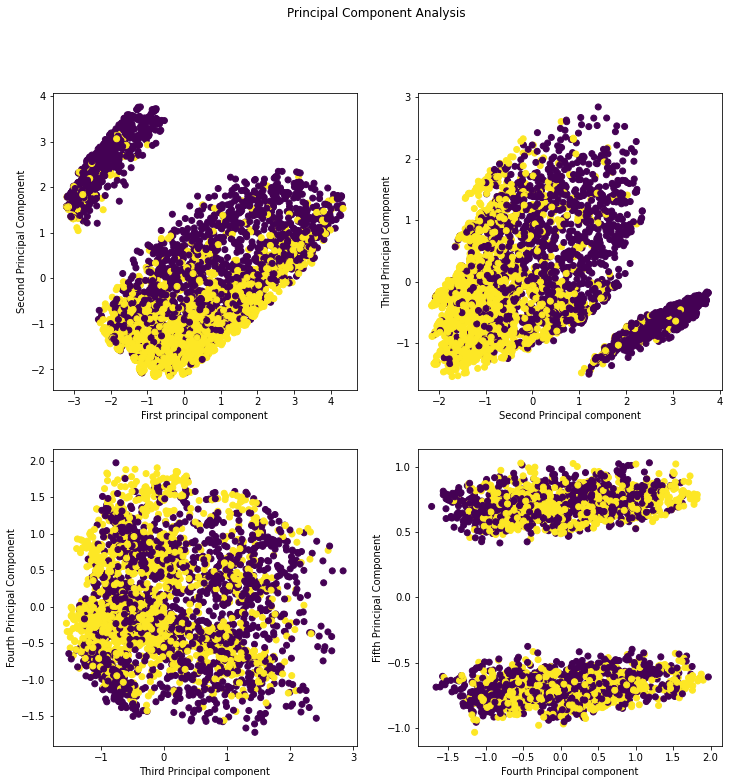

In [ ]:
# PCA - visualizate the first 5 dimensions

from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.preprocessing import StandardScaler

telcom_scaled = preprocessing.StandardScaler().fit(telcom_sorted[{'MonthlyCharges','TotalCharges','tenure'}]).transform(telcom_sorted[{'MonthlyCharges','TotalCharges','tenure'}])
telcom_scaled = pd.DataFrame(telcom_scaled, columns = ['MonthlyCharges','TotalCharges','tenure'])
telcom_scaled_full = pd.concat([telcom_oh,telcom_scaled],axis=1)  
telcom_scaled_full
pca = PCA(n_components=5)
pca.fit(telcom_scaled_full)
x_pca = pca.transform(telcom_scaled_full)


# defining a function to visualize the PCA first 5 components
def pc_visualization(X,label):
    fig, axs = plt.subplots(2, 2,figsize=(12,12))
    axs[0, 0].scatter(X[:,0],X[:,1], c=label)
    axs[0, 0].set_xlabel('First principal component')
    axs[0, 0].set_ylabel('Second Principal Component')
    axs[0, 1].scatter(X[:,1],X[:,2], c=label)
    axs[0, 1].set_xlabel('Second Principal component')
    axs[0, 1].set_ylabel('Third Principal Component')
    axs[1, 0].scatter(X[:,2],X[:,3], c=label)
    axs[1, 0].set_xlabel('Third Principal component')
    axs[1, 0].set_ylabel('Fourth Principal Component')
    axs[1, 1].scatter(X[:,3],X[:,4], c=label)
    axs[1, 1].set_xlabel('Fourth Principal component')
    axs[1, 1].set_ylabel('Fifth Principal Component')
    fig.suptitle('Principal Component Analysis')
    
pc_visualization(x_pca, telcom_sorted['Churn'])

In [ ]:
telcom_scaled_full

,SeniorCitizen,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PhoneService_No,PhoneService_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,DeviceProtection_No,...,Contract_One year,Contract_Two year,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,Dependents_No,Dependents_Yes,MonthlyCharges,TotalCharges,tenure
0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,1,2.328513,1.127377,1.808281
1,0,0,1,0,0,1,1,0,0,1,...,0,0,1,0,0,1,0,-0.867477,0.076584,-1.071966
2,0,0,1,0,0,1,1,0,0,1,...,0,0,1,0,0,1,0,-0.896268,0.442532,-1.113708
3,0,0,1,0,0,1,0,0,1,1,...,0,0,1,0,0,1,0,-0.354439,0.630733,-0.529310
4,1,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,1,0,0.432407,-0.622202,1.307369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,0,1,0,0,0,1,1,0,0,1,...,1,0,1,0,0,0,1,-0.250574,0.048702,-0.237112
3734,0,1,0,0,0,1,0,0,1,1,...,0,0,0,0,1,0,1,-0.871760,-0.249284,-1.071966
3735,1,1,0,0,0,1,0,0,1,0,...,0,1,1,0,0,1,0,1.262553,0.412907,1.432597
3736,0,0,1,0,0,1,1,0,0,1,...,0,0,1,0,0,1,0,-0.849210,0.433819,-1.071966


#Variance plot for PCA

In [ ]:
# defining a function to plot the variance as the num of components increases
def variace_plot():
    pca = PCA()
    pca.fit(telcom_scaled_full)
    exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

    fig = px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"},
    )
    fig.show()
    
variace_plot()

In [ ]:
'''
We can observe that there is large increase of variance from 2 to 20 components and later it is uniform
'''

'\nWe can observe that there is large increase of variance from 2 to 20 components and later it is uniform\n'

#Features having Correlation < 50%Z

In [ ]:
# Keep the first 23 principle components, with 100% variance retained.
x_pca = PCA(n_components=23)
pca.fit(telcom_scaled_full)
x_pca = pca.transform(telcom_scaled_full)
x_pca = pd.DataFrame(x_pca)
# defining function to plot the correlation 
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    for colname in col_corr:
        dataset.drop(colname, axis=1, inplace=True)
     
    return print('There are {} features with correlation less than 50%: \n {}'.format(telcom_full.shape[1],telcom_full.columns))

correlation(telcom_full,0.5)

There are 34 features with correlation less than 50%: 
 Index(['SeniorCitizen', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'PhoneService_No', 'PhoneService_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'Partner_No', 'Partner_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Female', 'gender_Male', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'MultipleLines_No', 'MultipleLines_Yes', 'Dependents_No',
       'Dependents_Yes', 'TotalCharges'],
      dtype='object')


#Splitting data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

# Use the first 23 principle components 
X_train_pc23, X_test_pc23, Y_train, Y_test = train_test_split(x_pca, pd.DataFrame(telcom_sorted['Churn']), test_size=0.1, random_state=3)

# Alternatively, use features where in between correlation < 50 % 
X_train, X_test, Y_train, Y_test = train_test_split(telcom_full, pd.DataFrame(telcom_sorted['Churn']), test_size=0.1, random_state=3)

In [ ]:
# print classification report 

def performance(model,X_test,Y_test):
    yhat = model.predict(X_test)
    print('Classification report : \n',classification_report(Y_test, yhat))
    print('Confusion matrix : \n',confusion_matrix(Y_test,yhat))
    acc_pct = np.around(((confusion_matrix(Y_test,yhat)[0][0]+confusion_matrix(Y_test,yhat)[1][1])/confusion_matrix(Y_test,yhat).sum())*100 , decimals=2)
    return print('Test accuracy : {}%'.format(acc_pct))


#Implementing Logistic Regression Model

In [ ]:
# Logistics Regression

from sklearn.linear_model import LogisticRegression

def Logistic_Regression(X, Y_train):
    np.random.seed(999)
    LR_classifier = LogisticRegression()
    params = [{'solver': ['newton-cg', 'lbfgs'], 'penalty':['l2', 'none'], 'C': [10, 1.0, 0.1]}, # defining multiple parameters and passing them to grid search cv to find best parameter
              {'solver': ['liblinear'], 'penalty':['l2','l1'], 'C': [10, 1.0, 0.1]}]
    #implementing gridsearch cv
    gs_LR = GridSearchCV(estimator=LR_classifier, 
                     param_grid=params, 
                     cv=5,
                     verbose=2, 
                     refit = True,
                     scoring='accuracy')
    gs_LR = gs_LR.fit(X, Y_train)
    return gs_LR

gs_LR = Logistic_Regression(X_train_pc23, Y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...............C=10, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...............C=10, penalty=none, solv

In [ ]:
print("Best: %f using %s" % (gs_LR.best_score_, gs_LR.best_params_))

Best: 0.759220 using {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


##Performance Metrics  of Logistic Regression

In [ ]:
performance(gs_LR, X_test_pc23 , Y_test)

Classification report : 
               precision    recall  f1-score   support

           0       0.72      0.71      0.71       184
           1       0.72      0.73      0.72       190

    accuracy                           0.72       374
   macro avg       0.72      0.72      0.72       374
weighted avg       0.72      0.72      0.72       374

Confusion matrix : 
 [[131  53]
 [ 52 138]]
Test accuracy : 71.93%


""


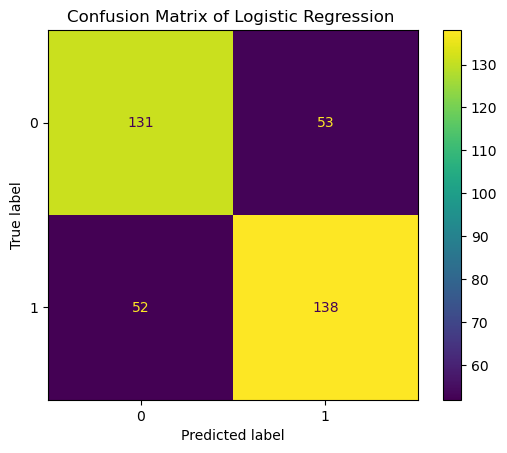

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gs_LR, X_test_pc23, Y_test)  
plt.title("Confusion Matrix of Logistic Regression ")
plt.show()

#Implementing Random Forest Classifier

In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

def RandomForest(X, Y_train):
    rf = RandomForestClassifier(oob_score=True, random_state=1, n_jobs=-1)
    param_grid = {'max_features': ['auto','log2'], 
                  "criterion" : ["gini", "entropy"], # used gini and entropy as criterion
                  'max_depth': [1, 2, 3, 4, 5, 6], 
                  "min_samples_split" : [2, 4, 6, 8, 10], 
                  "n_estimators": [50, 100, 400]}
    gs_RF = GridSearchCV(estimator=rf, param_grid=param_grid, verbose=2, scoring='accuracy', cv=5, n_jobs=-1)
    gs_RF = gs_RF.fit(X, Y_train)
    return gs_RF
gs_RF = RandomForest(X_train_pc23, Y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


##Performance metrics of Random Forest

In [ ]:
print("Best: %f using %s" % (gs_RF.best_score_, gs_RF.best_params_)) 

Best: 0.765164 using {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 6, 'n_estimators': 50}


##Classification report of Random Forest

In [ ]:
# Print classification report 
performance(gs_RF, X_test_pc23, Y_test) 

Classification report : 
               precision    recall  f1-score   support

           0       0.73      0.68      0.70       184
           1       0.71      0.75      0.73       190

    accuracy                           0.72       374
   macro avg       0.72      0.72      0.72       374
weighted avg       0.72      0.72      0.72       374

Confusion matrix : 
 [[125  59]
 [ 47 143]]
Test accuracy : 71.66%


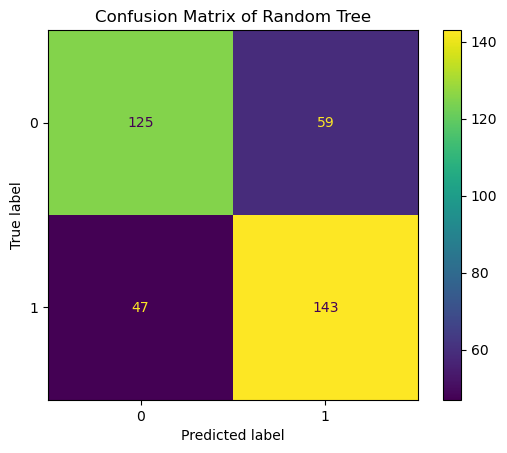

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gs_RF, X_test_pc23, Y_test)  
plt.title("Confusion Matrix of Random Tree")
plt.show()

#Decision Tree

In [ ]:
# Decision Tree 

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

def DecisionTree(X, Y_train):
    cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)
    df_classifier = DecisionTreeClassifier(random_state=999)
    params = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             "min_samples_split" : [2, 4, 6, 8, 10],
             "max_features": ['auto','log2']
             }
    gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params, 
                     cv=cv_method,
                     verbose=2, 
                     scoring='accuracy',
                     n_jobs=-1)
    gs_DT = gs_DT.fit(X, Y_train)
    return gs_DT

gs_DT = DecisionTree(X_train, Y_train)

Fitting 15 folds for each of 200 candidates, totalling 3000 fits


##Perfromance Metrics of Decision Tree

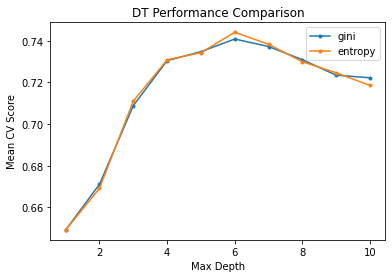

In [ ]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']

for i in ['gini', 'entropy']:
    temp = results_DT[results_DT['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()


In [ ]:
print("Best: %f using %s" % (gs_DT.best_score_, gs_DT.best_params_)) 

Best: 0.744747 using {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 4}


In [ ]:
#!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn import tree
from IPython.display import SVG
from graphviz import Source

In [ ]:
dot_data = tree.export_graphviz(gs_DT.best_estimator_, out_file=None, 
            filled=True, rounded=True, feature_names=telcom_full.columns, class_names=['0','1','2'])

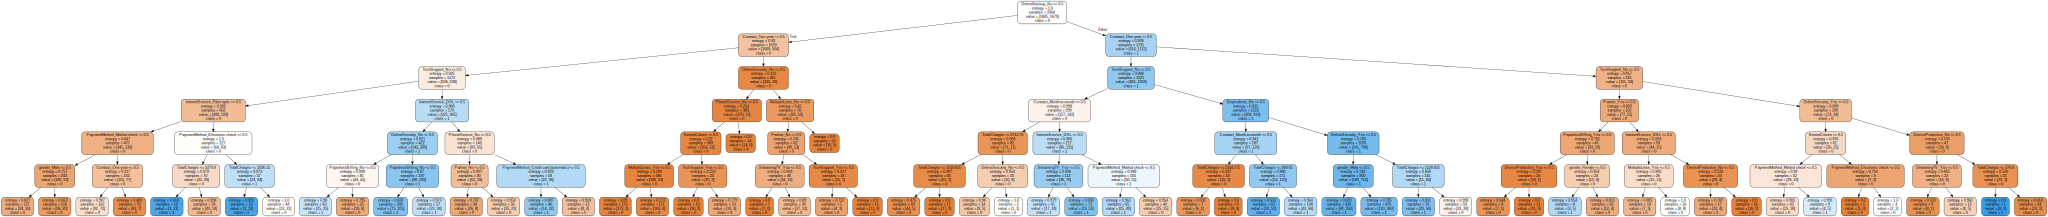

In [ ]:
graph = Source(dot_data)  
graph 

In [ ]:
# Print classification report 
performance(gs_DT, X_test, Y_test) 

Classification report : 
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       184
           1       0.73      0.73      0.73       190

    accuracy                           0.72       374
   macro avg       0.72      0.72      0.72       374
weighted avg       0.72      0.72      0.72       374

Confusion matrix : 
 [[132  52]
 [ 51 139]]
Test accuracy : 72.46%


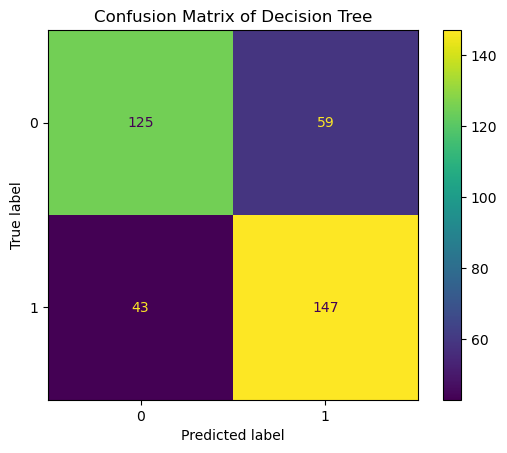

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gs_DT, X_test, Y_test)  
plt.title("Confusion Matrix of Decision Tree")
plt.show()

#Adaboost

In [ ]:


# Adaboost

from sklearn.ensemble import AdaBoostClassifier

def AdaBoost(X,Y_train):
    # Create and fit an AdaBoosted decision tree
    ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))
    params={'n_estimators':[100,200,400],
            'learning_rate':[.001,0.01,.1]}
    gs_ada=GridSearchCV(estimator=ada,param_grid=params,scoring='accuracy',verbose=2, refit = True, n_jobs=-1,cv=5)
    gs_ada =gs_ada.fit(X,Y_train)
    return gs_ada
gs_ada = AdaBoost(X_train,Y_train)



Fitting 5 folds for each of 9 candidates, totalling 45 fits


##Performace metrics of Adaboost

In [ ]:
print("Best: %f using %s" % (gs_ada.best_score_, gs_ada.best_params_)) 

Best: 0.769328 using {'learning_rate': 0.1, 'n_estimators': 200}


In [ ]:
performance(gs_ada, X_test, Y_test)

Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.66      0.72       184
           1       0.72      0.82      0.76       190

    accuracy                           0.74       374
   macro avg       0.75      0.74      0.74       374
weighted avg       0.75      0.74      0.74       374

Confusion matrix : 
 [[122  62]
 [ 34 156]]
Test accuracy : 74.33%


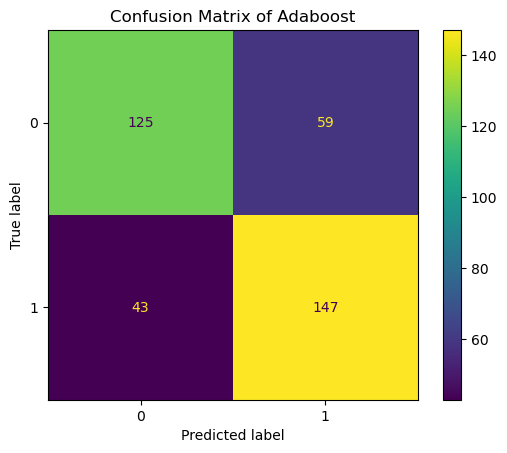

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gs_DT, X_test, Y_test)  
plt.title("Confusion Matrix of Adaboost")
plt.show()

In [ ]:
#Add Learning curve

from sklearn.model_selection import learning_curve
from sklearn.metrics import explained_variance_score, make_scorer
from sklearn.model_selection import KFold

def plot_curve():
    
    # instantiate
    ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=400, learning_rate=0.1 )

    # fit
    ada.fit(X_train_pc23,Y_train)
    
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    cv = KFold(len(X_train_pc23), shuffle=True)
    
    train_sizes, train_scores, test_scores = learning_curve(ada, X_train_pc23, Y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("AdaBoostClassifier")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="lower right")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()

In [ ]:
#!pip install pillow

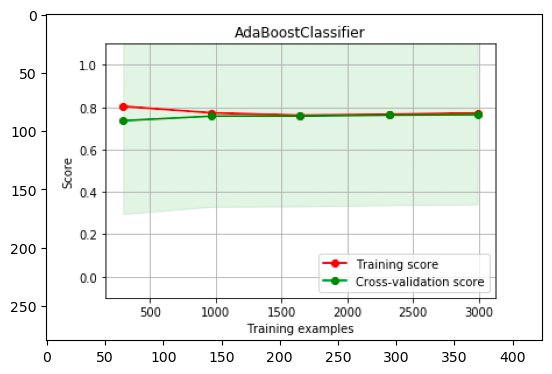

In [ ]:
plot_curve()

#Summary 

In [ ]:
""""

Telecom Churn Classification Test Accuracy Summary:

Logistics Regression: 71.93 %

Random forest : 71.66 %

Decision Tree: 72.46 %

Adaboost : 74.3 %
"""

'"\n\nTelecom Churn Classification Test Accuracy Summary:\n\nLogistics Regression: 71.93 %\n\nRandom forest : 71.66 %\n\nDecision Tree: 72.46 %\n\nAdaboost : 74.3 %\n'